### Capstone Project 3 Imannov Kaba - EDA (TRAVEL INSURANCE)

Importing libraries

In [67]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") ##imported this to ignore all warnings
sns.set_theme()
from matplotlib.ticker import PercentFormatter



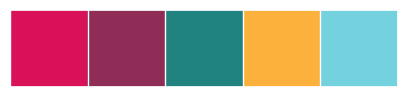

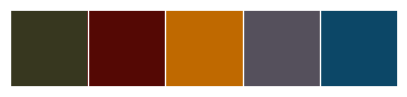

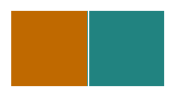

In [7]:
color_palette = ["#D81159", "#8F2D56", '#218380', '#FBB13C', '#73D2DE']
dark_color = ["#37371F", "#540804", '#BF6900', '#55505C', '#0C4767']
two_tone = [dark_color[2], color_palette[2]]
sns.palplot(color_palette)
sns.palplot(dark_color)
sns.palplot(two_tone)

In [11]:
df = pd.read_csv("data_travel_insurance.csv")
df_copy = df.copy() #always make a backup of a data
df.head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [3]:
print(f"This dataset consists of {df.shape[0]} rows and {df.shape[1]} columns.")
print("Columns of the dataset: ")
print("---"*20)
print(df.info())

This dataset consists of 44328 rows and 11 columns.
Columns of the dataset: 
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB
None


In [5]:
df.describe(include=np.number).T #T here is to transpose. personal preference, feel free to delete the T to show the untransposed

,count,mean,std,min,25%,50%,75%,max
Duration,44328.0,49.424292,109.153961,-1.0,9.0,22.0,53.00,4881.0
Net Sales,44328.0,40.550948,48.661970,-357.5,18.0,26.5,48.00,810.0
Commision (in value),44328.0,9.707692,19.625637,0.0,0.0,0.0,11.55,283.5
Age,44328.0,39.925600,13.954926,0.0,35.0,36.0,43.00,118.0


Kesimpulan:
1. Net sales negative
2. Durasi negatif. Maximum durationnya sangat tinggi (bisa jadi outliers disebabkan oleh salah entry.)
3. Age paling tuanya 118 (bisa jadi disebabkan oleh salah entry)

In [6]:
df.describe(include='object').T

,count,unique,top,freq
Agency,44328,16,EPX,24656
Agency Type,44328,2,Travel Agency,32113
Distribution Channel,44328,2,Online,43572
Product Name,44328,26,Cancellation Plan,12979
Gender,12681,2,M,6504
Destination,44328,138,SINGAPORE,9267
Claim,44328,2,No,43651


Kesimpulan:
1. Destinasinya sangat banyak 138 (very high cardinality)
2. Product name juga banyak 26 (high cardinality)
3. Gender banyak yang null


In [8]:
#cek jumlah data null di tabel
df.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64

In [9]:
#cek persentase null di gender
null_gender = df.Gender.isna().sum()/len(df.Gender)

print(f"{round(null_gender*100,3)} % of the data is missing for the Gender column.")

71.393 % of the data is missing for the Gender column.


In [12]:
#data null di gender ini akan diisi dengan 'Unidentified' karena kita belum tau Gender ini penting atau engga
#Kalo ga penting nanti tinggal di drop saja

df["Gender"].fillna("Not Specified", inplace=True)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,Not Specified,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,Not Specified,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [13]:
#cek data duplicate
print(f"Number of duplicated rows: {df.duplicated().sum()}")

Number of duplicated rows: 4667


In [14]:
#drop duplicate data
df.drop_duplicates(inplace=True)
print(f"Number of duplicated rows: {df.duplicated().sum()}")

Number of duplicated rows: 0


In [18]:
#karena kolom Claim itu kategorikal, dengan unique valuesnya 2 aja, kemungkinannya hanya Yes & No, kita bakal ubah jadi binary
df['Claim'] = df['Claim'].apply(lambda x: 1 if x=='Yes' else 0)

There are 38986 Rejected claims
There are 675 Accepted claims


Text(0.5, 1.0, 'Customer Claims')

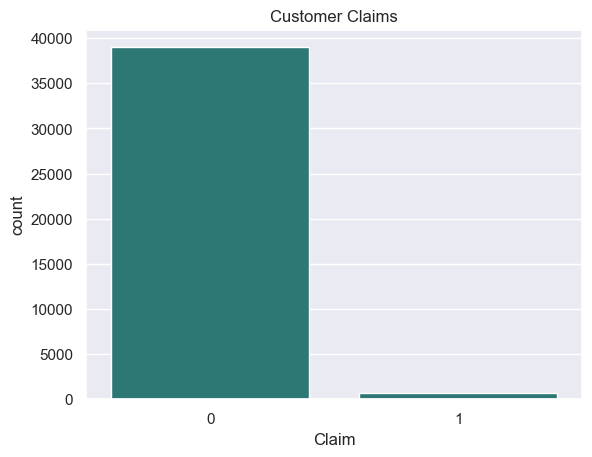

In [20]:
#kita mau cek disini 1 berarti yes, 0 berarti no
print(f'There are {len(df[df["Claim"]==0])} Rejected claims')
print(f'There are {len(df[df["Claim"]==1])} Accepted claims')
sns.countplot(x=df["Claim"], color=color_palette[2]).set_title("Customer Claims")

Datanya imbalanced, yang berarti "Minority class classification"

#### Net Sales - Commission

In [25]:
#kita coba cek Net Sales & Commission, apakah berkorelasi
df["Net Sales"].corr(df["Commision (in value)"])

0.640096191467467

Nggak besar nilai korelasinya tapi jelas berkorelasi.
Net sales nggak boleh lebih kecil dari commission, karena biasanya commission itu diwakilin dari fungsi net sales

In [26]:
#ngecek nilai sales apakah ada yang lebih kecil dari commission atau ngga
df_sales_commision = df[df["Net Sales"]<df["Commision (in value)"]]
df_sales_commision.sample(10)

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
13991,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,50,AUSTRALIA,0.0,59.40,41,0
26556,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,29,AUSTRALIA,-49.5,29.70,33,0
28824,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,34,ITALY,-69.3,41.58,49,0
33709,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,65,AUSTRALIA,0.0,53.46,37,0
2779,C2B,Airlines,Online,Silver Plan,F,19,SINGAPORE,0.0,18.00,44,0
29302,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,176,AUSTRALIA,-39.6,23.76,32,0
40713,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,148,NETHERLANDS,0.0,5.94,31,0
43350,C2B,Airlines,Online,Annual Silver Plan,M,365,SINGAPORE,-289.0,72.25,30,0
16355,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,133,UNITED KINGDOM,0.0,11.88,31,0
24483,JZI,Airlines,Online,Basic Plan,M,2,MALAYSIA,0.0,6.30,35,0


dan ternyata ada.

<Axes: xlabel='Net Sales', ylabel='Count'>

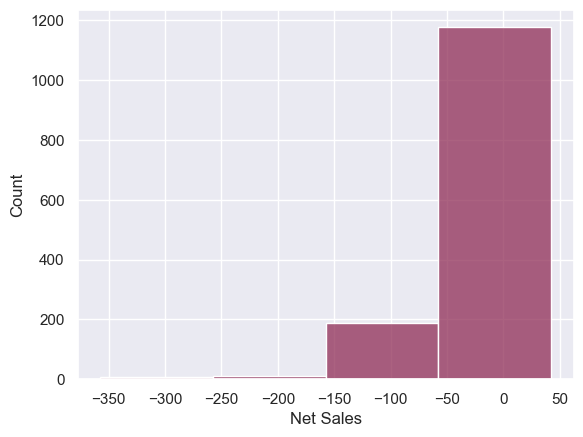

In [27]:
#ngecek distribusi net sales
sns.histplot(data=df_sales_commision, x="Net Sales",binwidth=100, color=color_palette[1])

In [29]:
# Asumsikan kita sudah meng-define 'df_sales_commision' DataFrame
print(f"There are {len(df_sales_commision)} records")
print(f'{len(df_sales_commision[df_sales_commision["Claim"] == 0])} unclaimed insurances')
print(f'{len(df_sales_commision[df_sales_commision["Claim"] == 1])} claimed insurances')
result = df_sales_commision.groupby(by='Claim')[["Net Sales", "Commision (in value)"]].sum()
print(result)


There are 1383 records
1383 unclaimed insurances
0 claimed insurances
       Net Sales  Commision (in value)
Claim                                 
0      -28909.11              37336.79


In [30]:
#karena nilainya 0, kita bakal drop
drop_netsales = list(df_sales_commision.index.values)
df.drop(index=drop_netsales, inplace = True)

#### Age

<Axes: xlabel='Age', ylabel='Count'>

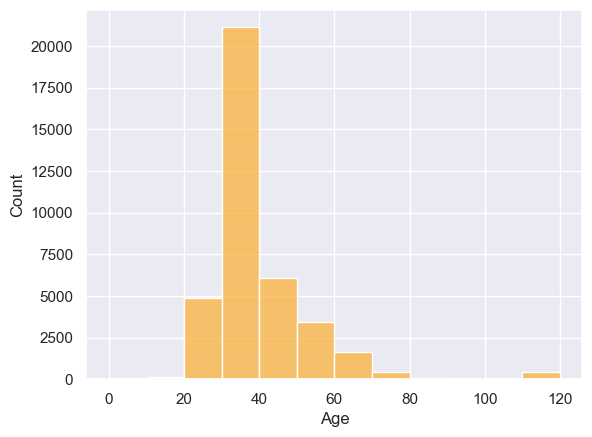

In [31]:
sns.histplot(data=df, x="Age",binwidth=10, color=color_palette[3])

There are 531 people over 80 in the records
523 of them havent claimed insurances
8 of them have claimed insurances


[Text(0, 0, '57'),
 Text(0, 0, '13'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '461')]

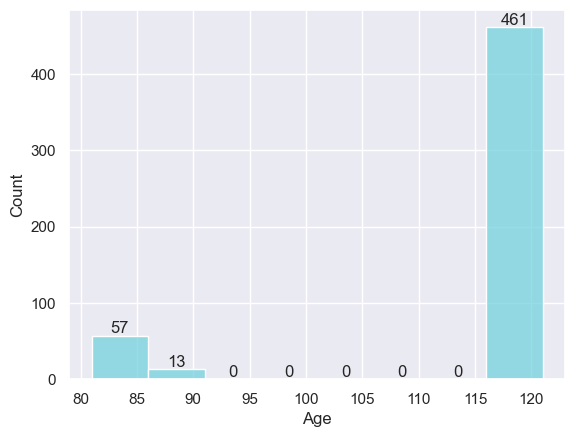

In [32]:
df_old = df[df['Age']>80]
print(f"There are {len(df_old)} people over 80 in the records")

print(f'{len(df_old[df_old["Claim"]==0])} of them havent claimed insurances')
print(f'{len(df_old[df_old["Claim"]==1])} of them have claimed insurances')
ax = sns.histplot(data=df_old, x="Age",binwidth=5, color=color_palette[4])
ax.bar_label(ax.containers[0])

In [35]:
#cek persentase orang tua
(len(df_old)/len(df))*100

1.387219812947385

Dari persentase keliatan bahwa jumlah orang tua itu sedikit, dan kalo dari grafik, keliatan bahwa kita nggak ada value di umur 95-115. Bisa diasumsikan kalo yang umur 120 itu salah input (nggak masuk akal juga jumlahnya). Jadi kita bakal drop yang 120

In [36]:
df_old = df[df['Age']>115]
df.drop(index=df_old.index.values, inplace = True)

#### Duration

In [37]:
df['Duration'].describe().T

count    37817.000000
mean        52.244916
std        115.180450
min          0.000000
25%         10.000000
50%         24.000000
75%         56.000000
max       4881.000000
Name: Duration, dtype: float64

Nilai minimum nya 0 hari. Travel insurance yang nilainya 0 hari itu tidak wajar

In [39]:
result = df[df['Duration'] == 0].groupby(by='Claim')[["Net Sales", "Commision (in value)"]].sum()
print(result)


       Net Sales  Commision (in value)
Claim                                 
0         359.13                144.74


Dari sini keliatan bahwa yang durationnya 0, nilai claimnya semuanya 0 yang mana berarti claimnya di reject. Jadi kita drop saja

In [42]:
#cek dulu jumlahnya
len(df[df['Duration']==0])

28

In [43]:
#mari kita drop
df.drop(index=df[df['Duration']==0].index.values, inplace = True)

<Axes: xlabel='Duration', ylabel='Count'>

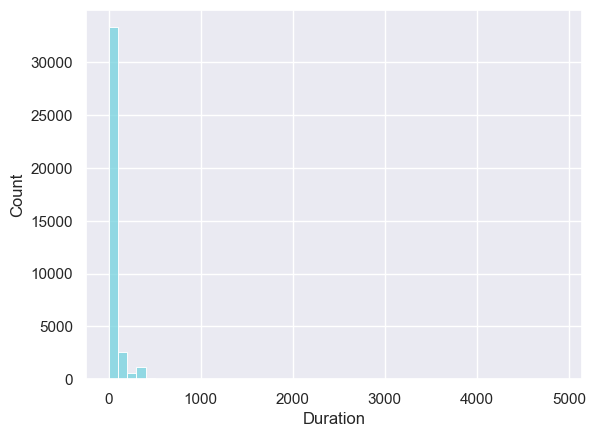

In [45]:
#plot lagi
sns.histplot(data=df, x="Duration",binwidth=100, color=color_palette[4])

Setahun ada 365 hari, kita coba cek apakah ada yang diatas 365. Agak aneh, siapa tahu outliers

[Text(0, 0, '849'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '12'),
 Text(0, 0, '1')]

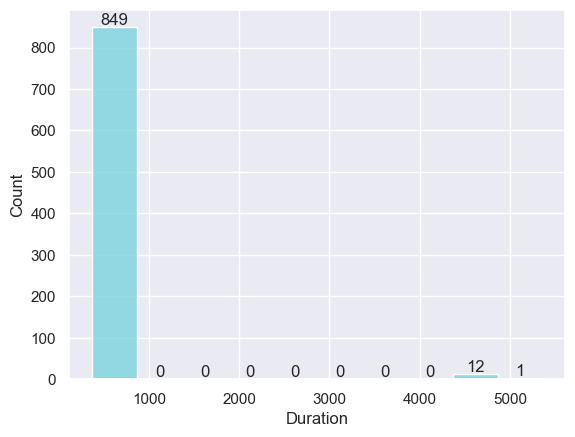

In [46]:
df_duration = df[df['Duration']>365]
ax = sns.histplot(data=df_duration, x="Duration",binwidth=500, color=color_palette[4])
ax.bar_label(ax.containers[0])

Ada 12 yang diatas 365. Kita bakal drop ini karena kemungkinan besar data entry error

In [48]:
df.drop(index=df[df['Duration']>400].index.values, inplace = True)

#### Gender

In [55]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Include the 'gender' column
filtered_df = pd.concat([df['Gender'], numeric_columns], axis=1)

# Now 'filtered_df' will only contain 'gender' and numeric columns
print(filtered_df)

              Gender  Duration  Net Sales  Commision (in value)  Age  Claim
0                  F       365      216.0                 54.00   57      0
1      Not Specified         4       10.0                  0.00   33      0
2                  M        19       22.0                  7.70   26      0
3      Not Specified        20      112.0                  0.00   59      0
4                  M         8       16.0                  4.00   28      0
...              ...       ...        ...                   ...  ...    ...
44322  Not Specified         6       40.0                  0.00   36      0
44323  Not Specified        14       30.0                  0.00   36      1
44324  Not Specified        17       79.2                 47.52   47      0
44325              M        64       30.0                 10.50   50      0
44326  Not Specified        51       36.0                  0.00   36      0

[37664 rows x 6 columns]


In [56]:
filtered_df.groupby(by='Gender').mean()

,Duration,Net Sales,Commision (in value),Age,Claim
Gender,,,,,
F,72.008991,59.309942,17.700464,40.534256,0.044416
M,60.439271,56.420666,17.368360,42.203258,0.038244
Not Specified,42.486411,38.053792,6.068498,37.951956,0.007560


In [57]:
filtered_df.groupby(by='Gender').describe().T

Gender                                F            M  Not Specified
Duration             count  5561.000000  5648.000000   26455.000000
                     mean     72.008991    60.439271      42.486411
                     std     110.463707   104.908703      48.279412
                     min       1.000000     1.000000       1.000000
                     25%      11.000000     9.000000      11.000000
                     50%      25.000000    18.000000      26.000000
                     75%      66.000000    48.000000      55.000000
                     max     400.000000   400.000000     342.000000
Net Sales            count  5561.000000  5648.000000   26455.000000
                     mean     59.309942    56.420666      38.053792
                     std      71.898358    72.290750      30.178229
                     min       1.550000     2.380000       0.000000
                     25%      22.000000    22.000000      19.000000
                     50%      30.000000    29.000000      28.000000
                     75%      56.700000    50.500000      50.000000
                     max     666.000000   682.000000     306.900000
Commision (in value) count  5561.000000  5648.000000   26455.000000
                     mean     17.700464    17.368360       6.068498
                     std      23.112815    24.444321      15.804590
                     min       0.000000     0.000000       0.000000
                     25%       6.380000     6.300000       0.000000
                     50%       9.750000     9.100000       0.000000
                     75%      15.880000    15.750000       0.000000
                     max     262.760000   262.760000     184.140000
Age                  count  5561.000000  5648.000000   26455.000000
                     mean     40.534256    42.203258      37.951956
                     std      13.973277    13.420134       8.467568
                     min       0.000000     1.000000      13.000000
                     25%      30.000000    31.000000      36.000000
                     50%      37.000000    41.000000      36.000000
                     75%      49.000000    51.000000      38.000000
                     max      88.000000    87.000000      86.000000
Claim                count  5561.000000  5648.000000   26455.000000
                     mean      0.044416     0.038244       0.007560
                     std       0.206037     0.191801       0.086621
                     min       0.000000     0.000000       0.000000
                     25%       0.000000     0.000000       0.000000
                     50%       0.000000     0.000000       0.000000
                     75%       0.000000     0.000000       0.000000
                     max       1.000000     1.000000       1.000000

Tidak ada perbedaan signifikan di gender untuk claim dan fitur lain. Kita bakal drop gender di dataframe utama (df)

In [58]:
df.drop('Gender', axis=1, inplace = True)

#### Destination

Karena tadi di kolom destination cardinalitynya tinggi, kita bakal coba pakai prinsip Pareto untuk mengurangi cardinality

In [59]:
df['Destination'].unique()

array(['SINGAPORE', 'MALAYSIA', 'INDIA', 'UNITED STATES',
       'KOREA, REPUBLIC OF', 'THAILAND', 'GERMANY', 'JAPAN', 'INDONESIA',
       'VIET NAM', 'AUSTRALIA', 'FINLAND', 'UNITED KINGDOM', 'SRI LANKA',
       'SPAIN', 'HONG KONG', 'MACAO', 'CHINA',
       'IRAN, ISLAMIC REPUBLIC OF', 'TAIWAN, PROVINCE OF CHINA', 'POLAND',
       'CANADA', 'OMAN', 'PHILIPPINES', 'GREECE', 'BELGIUM', 'TURKEY',
       'BRUNEI DARUSSALAM', 'DENMARK', 'SWITZERLAND', 'SWEDEN', 'MYANMAR',
       'KENYA', 'CZECH REPUBLIC', 'FRANCE', 'RUSSIAN FEDERATION',
       'PAKISTAN', 'ARGENTINA', 'TANZANIA, UNITED REPUBLIC OF', 'SERBIA',
       'ITALY', 'CROATIA', 'NEW ZEALAND', 'UNITED ARAB EMIRATES',
       'NETHERLANDS', 'PERU', 'MONGOLIA', 'CAMBODIA', 'QATAR', 'NORWAY',
       'LUXEMBOURG', 'MALTA', "LAO PEOPLE'S DEMOCRATIC REPUBLIC",
       'ISRAEL', 'SAUDI ARABIA', 'AUSTRIA', 'PORTUGAL', 'UKRAINE',
       'ESTONIA', 'ICELAND', 'BRAZIL', 'MEXICO', 'CAYMAN ISLANDS',
       'PANAMA', 'BANGLADESH', 'TURKMENISTAN', 

In [60]:
#pakai crosstab function buat liat destination mana yang claimnya lebih banyak oke in
destinations=pd.crosstab(df["Destination"],df["Claim"]).sort_values(by=0, ascending = False)
destinations.head(20)

Claim,0,1
Destination,,
SINGAPORE,7580,411
THAILAND,3548,23
MALAYSIA,2984,16
CHINA,2853,32
AUSTRALIA,2163,29
INDONESIA,2006,10
UNITED STATES,1600,28
HONG KONG,1540,8
PHILIPPINES,1431,6


In [61]:
destinations.describe().T

,count,mean,std,min,25%,50%,75%,max
Claim,,,,,,,,
0,134.0,276.126866,865.203504,1.0,2.0,10.0,69.5,7580.0
1,134.0,4.947761,35.750454,0.0,0.0,0.0,1.0,411.0


In [62]:
#prinsip pareto
destinations["Total_Claim"] = destinations[0] + destinations[1]
destinations.head()

Claim,0,1,Total_Claim
Destination,,,
SINGAPORE,7580,411,7991
THAILAND,3548,23,3571
MALAYSIA,2984,16,3000
CHINA,2853,32,2885
AUSTRALIA,2163,29,2192


In [63]:
destinations["Cum_Percentage"] = round(destinations["Total_Claim"].cumsum()/destinations["Total_Claim"].sum()*100,2)

In [64]:
top_destinations = destinations.sort_values(by = "Total_Claim", ascending = False).head(50) 

Text(0, 0.5, 'Cumulative Percentage')

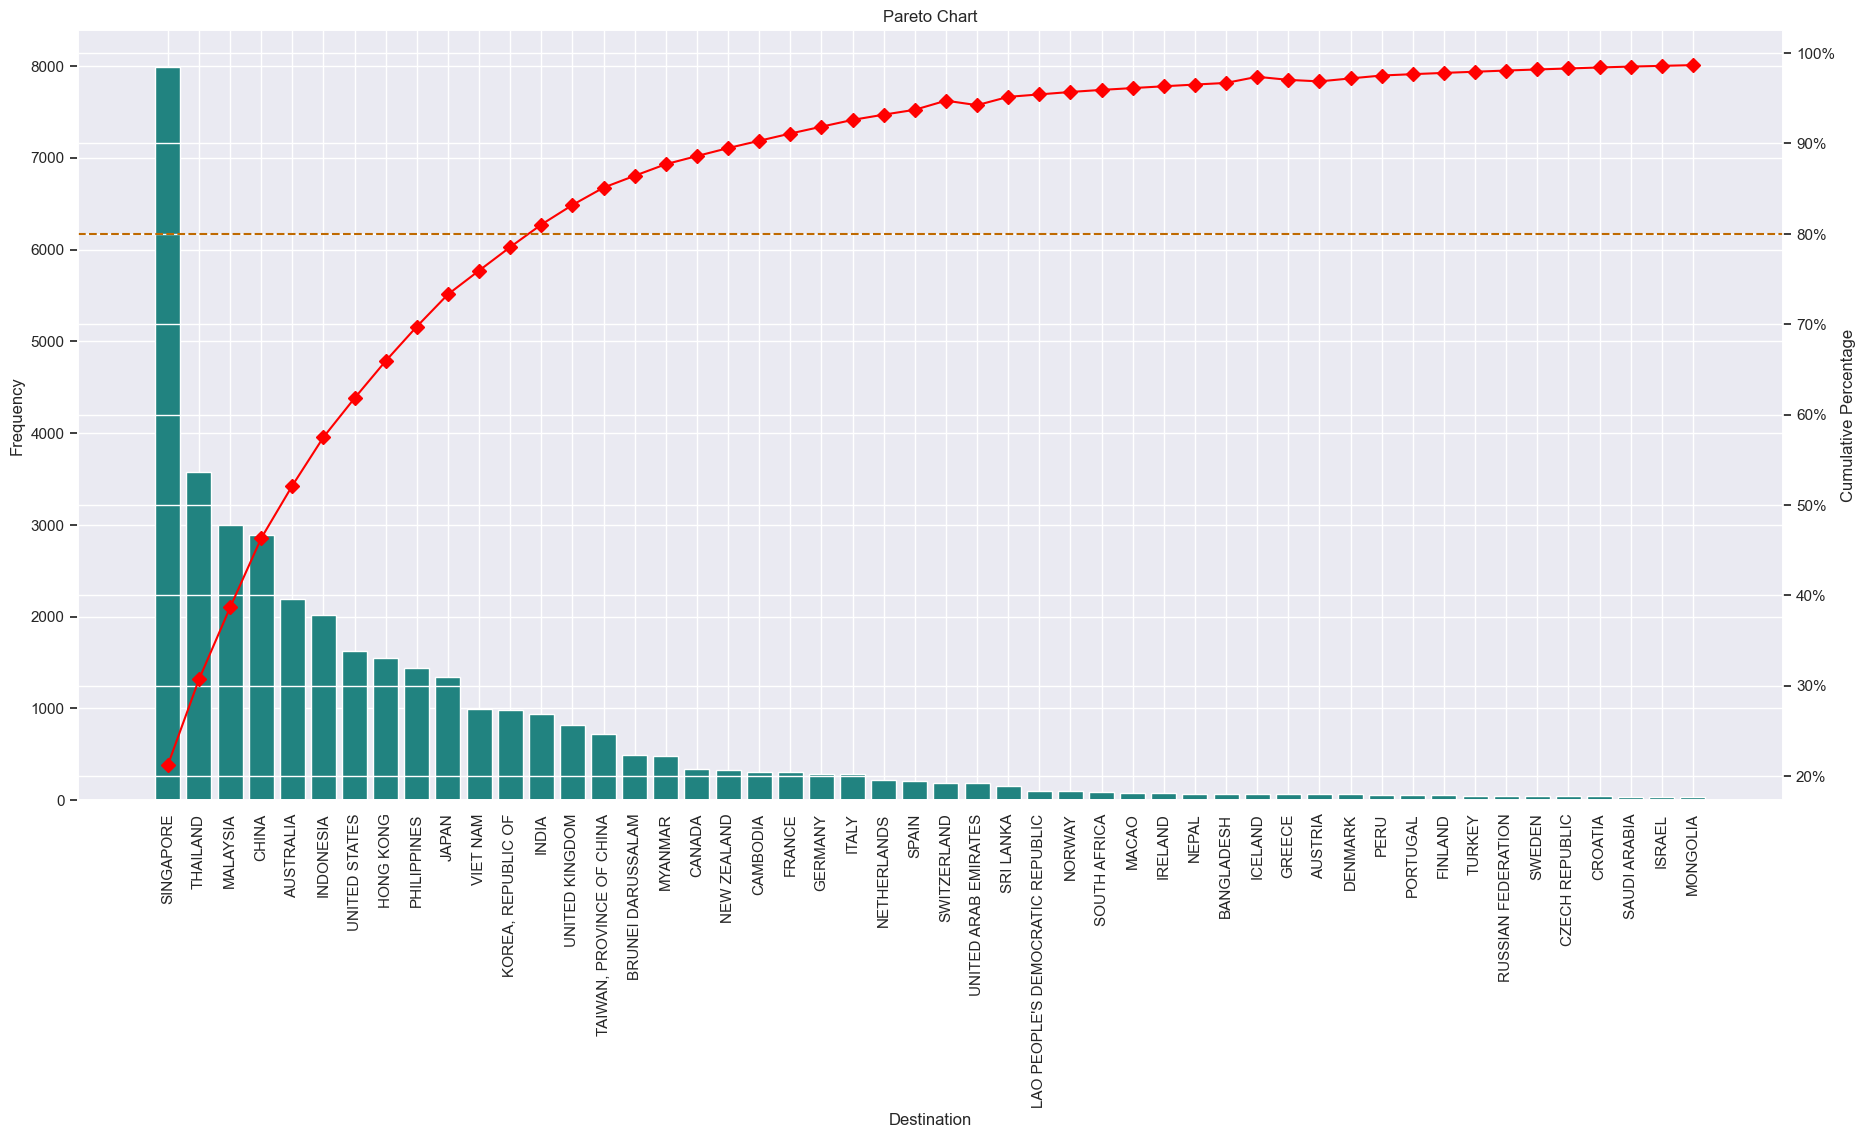

In [69]:
# Set figure and axis
fig, ax = plt.subplots(figsize=(22,10))

# Plot bars (i.e. frequencies)
ax.bar(top_destinations.index, top_destinations["Total_Claim"],color=color_palette[2])
ax.set_title("Pareto Chart")
ax.set_xlabel("Destination")
ax.set_ylabel("Frequency")
plt.xticks(rotation=90)

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(top_destinations.index, top_destinations["Cum_Percentage"], color="red", marker="D", ms=7)
ax2.axhline(80, color=dark_color[2], linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage")

Dari pareto chart, keliatan dia crossing di India.

In [72]:
destinations_to_grp = top_destinations.index[:13].values
destinations_to_grp

array(['SINGAPORE', 'THAILAND', 'MALAYSIA', 'CHINA', 'AUSTRALIA',
       'INDONESIA', 'UNITED STATES', 'HONG KONG', 'PHILIPPINES', 'JAPAN',
       'VIET NAM', 'KOREA, REPUBLIC OF', 'INDIA'], dtype=object)

In [71]:
df['Destination'] = df['Destination'].apply(lambda x: 'Other_Destination' if x not in destinations_to_grp else x)
df['Destination'].unique()

array(['SINGAPORE', 'MALAYSIA', 'INDIA', 'UNITED STATES',
       'KOREA, REPUBLIC OF', 'THAILAND', 'Other_Destination', 'JAPAN',
       'INDONESIA', 'VIET NAM', 'AUSTRALIA', 'HONG KONG', 'CHINA',
       'PHILIPPINES'], dtype=object)

#### Product Name

In [73]:
df['Product Name'].unique()

array(['Annual Silver Plan', 'Cancellation Plan', 'Basic Plan',
       '2 way Comprehensive Plan', 'Bronze Plan',
       '1 way Comprehensive Plan', 'Rental Vehicle Excess Insurance',
       'Single Trip Travel Protect Gold', 'Silver Plan', 'Value Plan',
       '24 Protect', 'Annual Travel Protect Gold', 'Comprehensive Plan',
       'Ticket Protector', 'Travel Cruise Protect',
       'Single Trip Travel Protect Silver',
       'Individual Comprehensive Plan', 'Gold Plan', 'Annual Gold Plan',
       'Child Comprehensive Plan', 'Single Trip Travel Protect Platinum',
       'Premier Plan', 'Annual Travel Protect Silver',
       'Annual Travel Protect Platinum',
       'Spouse or Parents Comprehensive Plan'], dtype=object)

In [75]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Include the 'gender' column
filtered_df = pd.concat([df['Product Name'], numeric_columns], axis=1)

# Now 'filtered_df' will only contain 'gender' and numeric columns
print(filtered_df)

                          Product Name  Duration  Net Sales  \
0                   Annual Silver Plan       365      216.0   
1                    Cancellation Plan         4       10.0   
2                           Basic Plan        19       22.0   
3             2 way Comprehensive Plan        20      112.0   
4                          Bronze Plan         8       16.0   
...                                ...       ...        ...   
44322         2 way Comprehensive Plan         6       40.0   
44323         2 way Comprehensive Plan        14       30.0   
44324  Rental Vehicle Excess Insurance        17       79.2   
44325            Travel Cruise Protect        64       30.0   
44326         2 way Comprehensive Plan        51       36.0   

       Commision (in value)  Age  Claim  
0                     54.00   57      0  
1                      0.00   33      0  
2                      7.70   26      0  
3                      0.00   59      0  
4                      4.00   28 

In [76]:
filtered_df.groupby(by='Product Name').mean()

,Duration,Net Sales,Commision (in value),Age,Claim
Product Name,,,,,
1 way Comprehensive Plan,25.750680,29.869897,0.000000,36.776810,0.003266
2 way Comprehensive Plan,45.422686,45.243361,0.000000,37.425416,0.011665
24 Protect,32.481707,24.914817,8.720061,48.030488,0.000000
Annual Gold Plan,371.208333,357.145000,89.287000,45.025000,0.125000
Annual Silver Plan,371.495037,228.953362,57.237742,41.016129,0.130273
Annual Travel Protect Gold,371.452830,250.063208,162.540943,38.622642,0.132075
Annual Travel Protect Platinum,371.966667,335.583333,218.128667,43.666667,0.033333
Annual Travel Protect Silver,373.888889,211.001389,137.150278,40.111111,0.111111
Basic Plan,34.699692,27.381192,9.583417,43.574587,0.004478


In [77]:
products = pd.crosstab(filtered_df["Product Name"],filtered_df["Claim"]).sort_values(by=0, ascending = False)
products

Claim,0,1
Product Name,,
Cancellation Plan,10902,31
2 way Comprehensive Plan,7964,94
Rental Vehicle Excess Insurance,4713,64
Basic Plan,3557,16
Bronze Plan,2501,161
1 way Comprehensive Plan,1831,6
Silver Plan,1372,108
Value Plan,1215,10
Annual Silver Plan,701,105


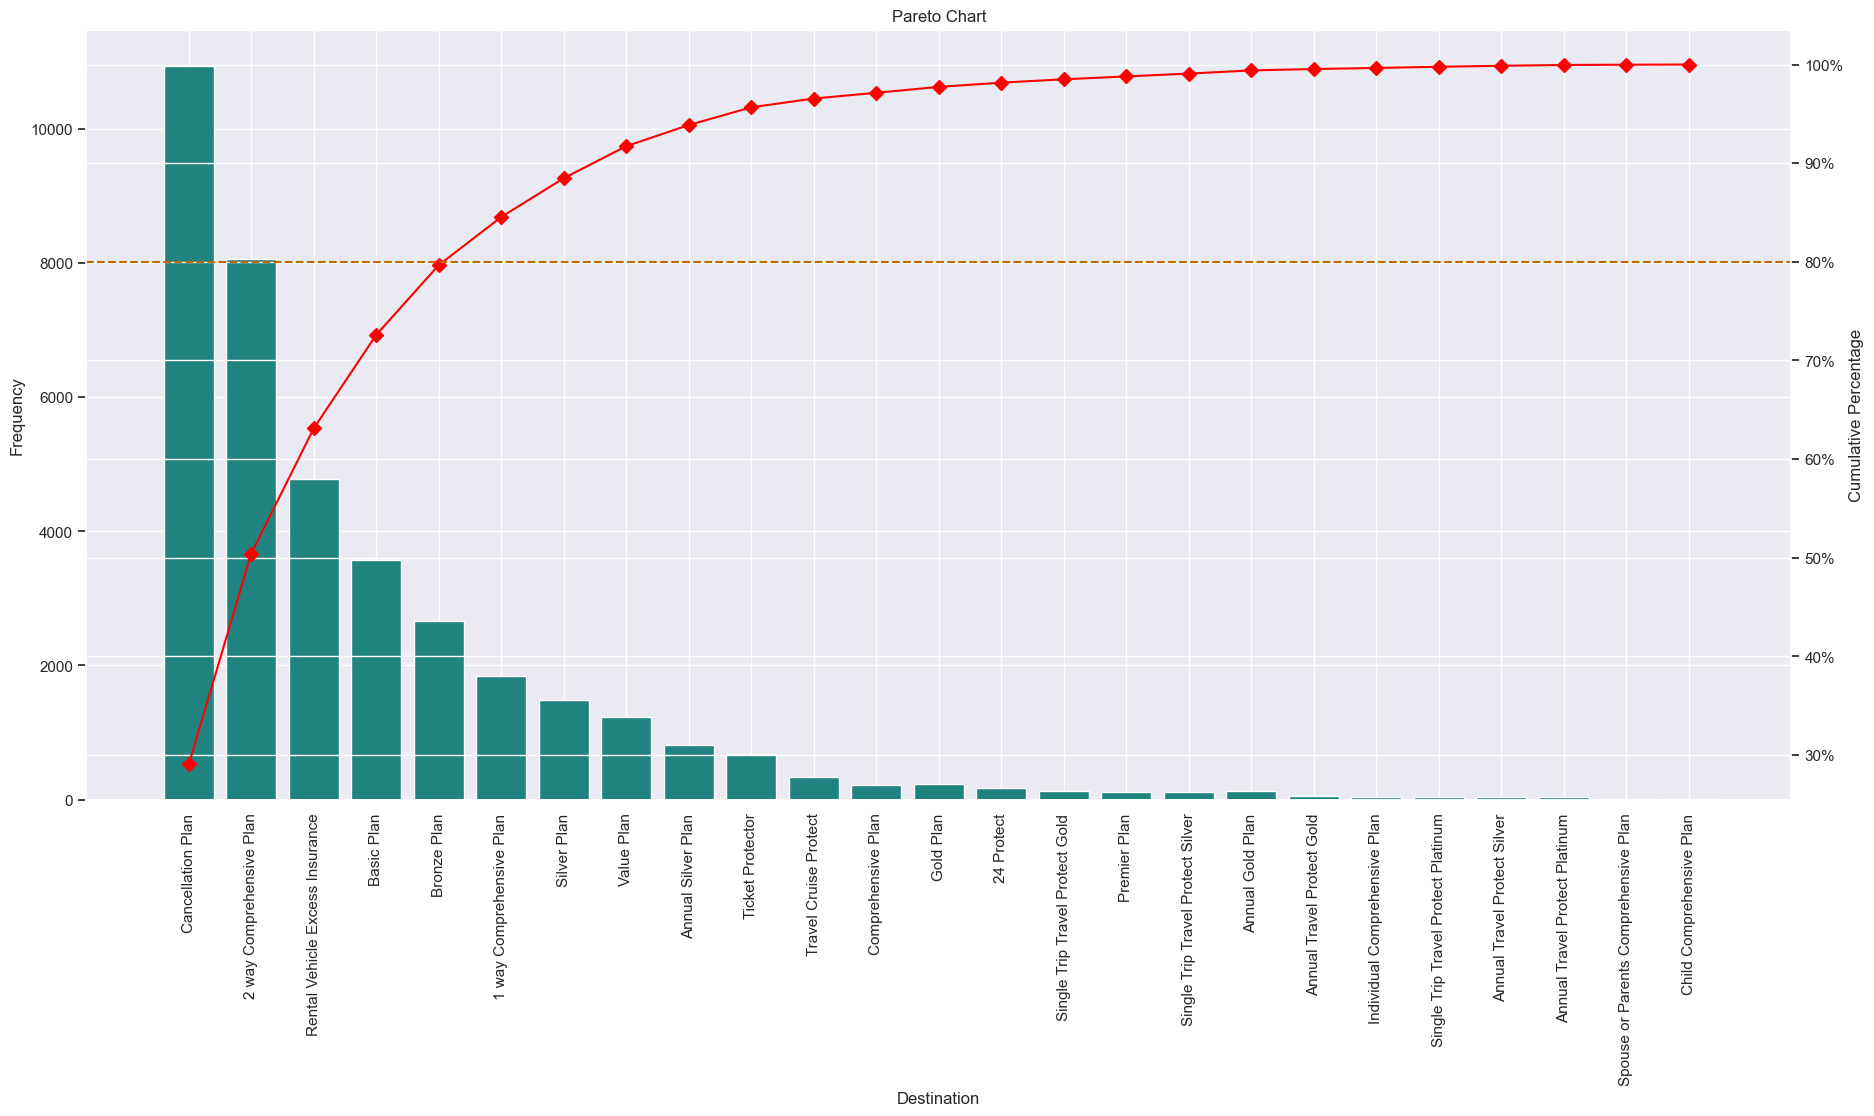

In [79]:
products["Total_Claim"] = products[0] + products[1]
products["Cum_Percentage"] = round(products["Total_Claim"].cumsum()/products["Total_Claim"].sum()*100,2)
# Set figure and axis
fig, ax = plt.subplots(figsize=(22,10))

# Plot bars (i.e. frequencies)
ax.bar(products.index, products["Total_Claim"],color=color_palette[2])
ax.set_title("Pareto Chart")
ax.set_xlabel("Destination")
ax.set_ylabel("Frequency")
plt.xticks(rotation=90)

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(products.index, products["Cum_Percentage"], color="red", marker="D", ms=7)
ax2.axhline(80, color=dark_color[2], linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage");

In [80]:
products_to_grp = products.index[:5].values
products_to_grp

array(['Cancellation Plan', '2 way Comprehensive Plan',
       'Rental Vehicle Excess Insurance', 'Basic Plan', 'Bronze Plan'],
      dtype=object)

Dari pareto chart, ~80% dari total claim nya :
1. Cancellation Plan
2. 2-way comprehensive plan
3. Rental Vehicle excess insurance
4. basic plan
5. bronze plan

yang lainnya bakal kita masukin ke 'Other' category.

In [81]:
df['Product Name'] = df['Product Name'].apply(lambda x: 'Other_Product' if x not in products_to_grp else x)
df['Product Name'].unique()

array(['Other_Product', 'Cancellation Plan', 'Basic Plan',
       '2 way Comprehensive Plan', 'Bronze Plan',
       'Rental Vehicle Excess Insurance'], dtype=object)

#### Agency

In [82]:
df['Agency'].unique()

array(['C2B', 'EPX', 'JZI', 'CWT', 'LWC', 'ART', 'CSR', 'RAB', 'KML',
       'SSI', 'TST', 'TTW', 'ADM', 'CCR', 'CBH'], dtype=object)

In [83]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Include the 'gender' column
filtered_df = pd.concat([df['Agency'], numeric_columns], axis=1)

# Now 'filtered_df' will only contain 'gender' and numeric columns
print(filtered_df)

      Agency  Duration  Net Sales  Commision (in value)  Age  Claim
0        C2B       365      216.0                 54.00   57      0
1        EPX         4       10.0                  0.00   33      0
2        JZI        19       22.0                  7.70   26      0
3        EPX        20      112.0                  0.00   59      0
4        C2B         8       16.0                  4.00   28      0
...      ...       ...        ...                   ...  ...    ...
44322    EPX         6       40.0                  0.00   36      0
44323    EPX        14       30.0                  0.00   36      1
44324    CWT        17       79.2                 47.52   47      0
44325    TST        64       30.0                 10.50   50      0
44326    EPX        51       36.0                  0.00   36      0

[37664 rows x 6 columns]


In [84]:
filtered_df.groupby(by='Agency').mean()

,Duration,Net Sales,Commision (in value),Age,Claim
Agency,,,,,
ADM,52.714286,106.000000,40.280000,22.685714,0.000000
ART,32.383784,27.670432,9.684541,47.832432,0.000000
C2B,87.396184,78.898472,19.726186,37.900435,0.075760
CBH,92.375000,29.453125,9.719531,57.062500,0.015625
CCR,73.170213,31.297872,10.328298,53.893617,0.010638
CSR,83.764706,31.676471,10.453235,57.661765,0.014706
CWT,40.646221,54.840653,32.904392,40.685158,0.013398
EPX,42.331093,35.278855,0.000000,36.972585,0.006290
JZI,35.681093,33.570600,11.749710,43.635155,0.005319


In [85]:
agencies = pd.crosstab(filtered_df['Agency'],filtered_df['Claim']).sort_values(by=0, ascending = False)
agencies

Claim,0,1
Agency,,
EPX,20697,131
C2B,4892,401
CWT,4713,64
JZI,4114,22
SSI,675,5
RAB,460,1
LWC,370,28
TST,333,2
KML,242,5


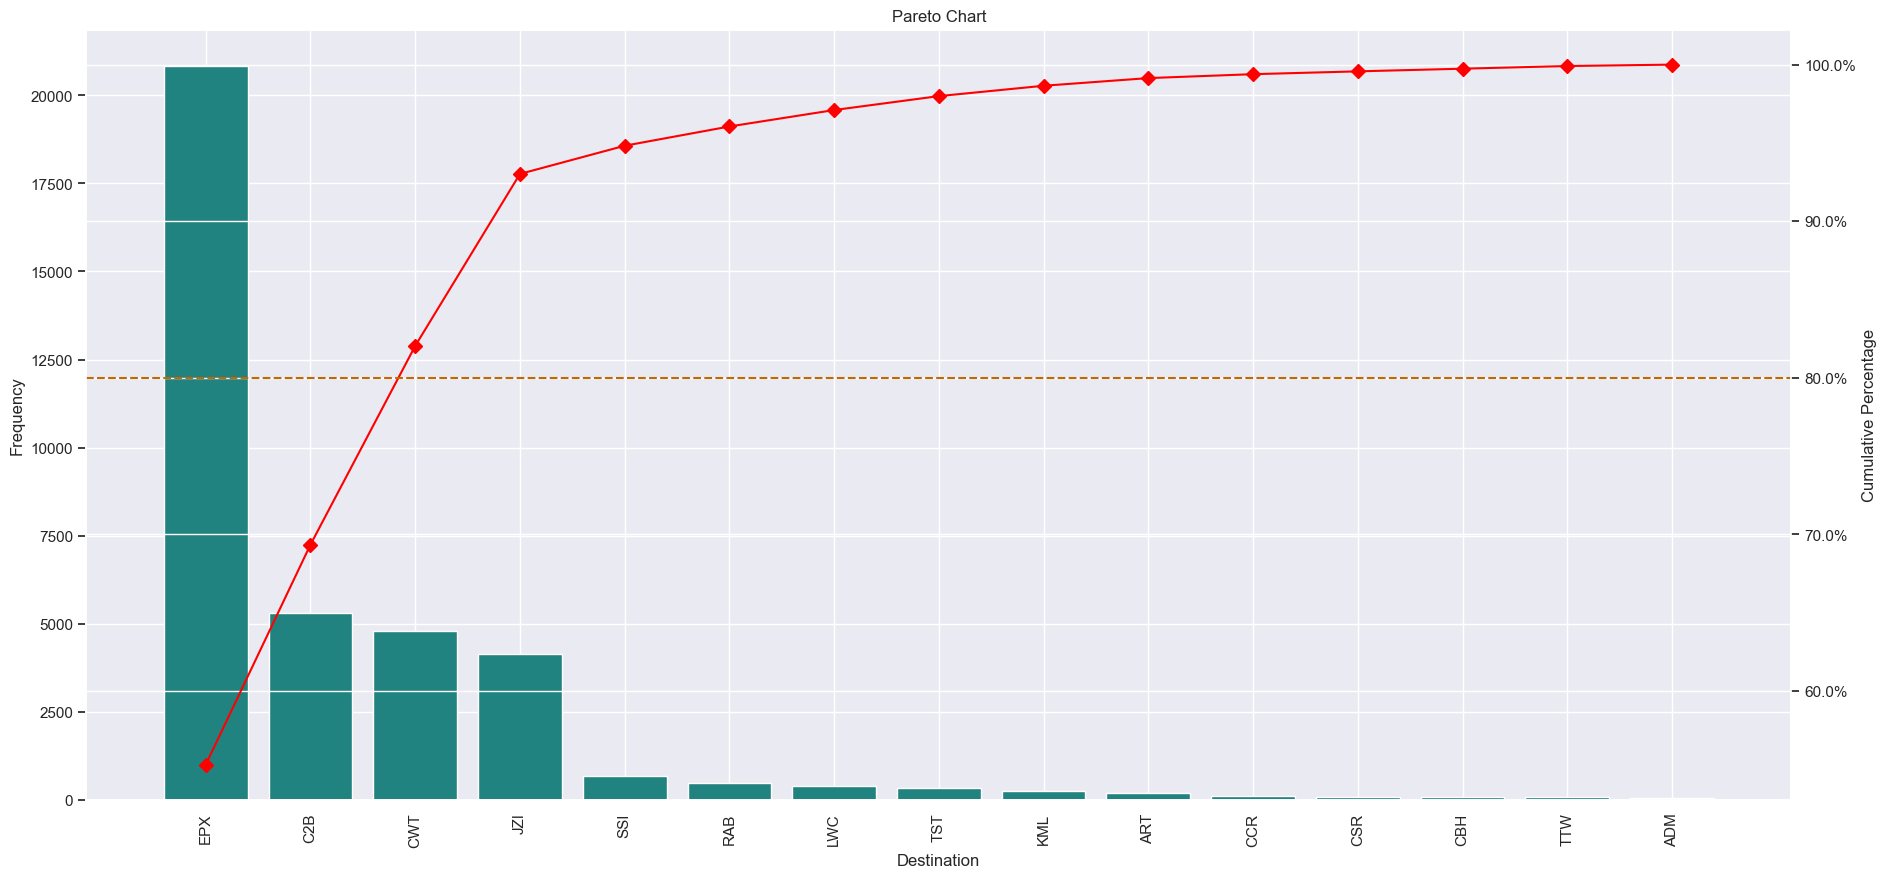

In [86]:
agencies["Total_Claim"] = agencies[0] + agencies[1]
agencies["Cum_Percentage"] = round(agencies["Total_Claim"].cumsum()/agencies["Total_Claim"].sum()*100,2)
# Set figure and axis
fig, ax = plt.subplots(figsize=(22,10))

# Plot bars (i.e. frequencies)
ax.bar(agencies.index, agencies["Total_Claim"],color=color_palette[2])
ax.set_title("Pareto Chart")
ax.set_xlabel("Destination")
ax.set_ylabel("Frequency")
plt.xticks(rotation=90)

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(agencies.index, agencies["Cum_Percentage"], color="red", marker="D", ms=7)
ax2.axhline(80, color=dark_color[2], linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage");

In [87]:
agencies_to_grp = agencies.index[:3].values
agencies_to_grp

array(['EPX', 'C2B', 'CWT'], dtype=object)

Selain EPX, C2B, dan CWT, kita masukin ke Others

In [88]:
df['Agency'] = df['Agency'].apply(lambda x: 'Other_Agency' if x not in agencies_to_grp else x)
df['Agency'].unique()

array(['C2B', 'EPX', 'Other_Agency', 'CWT'], dtype=object)

#### Modeling

In [89]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Other_Product,365,SINGAPORE,216.0,54.0,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,0
2,Other_Agency,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0


In [90]:
categoricals=list(df.select_dtypes(include=["object"]).columns)
categoricals

['Agency',
 'Agency Type',
 'Distribution Channel',
 'Product Name',
 'Destination']

##### One Hot Encoding

In [91]:
#OHE ke categorical data
one_hot=pd.get_dummies(data=df, columns=categoricals)
one_hot.head()

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_C2B,Agency_CWT,Agency_EPX,Agency_Other_Agency,Agency Type_Airlines,...,Destination_INDONESIA,Destination_JAPAN,"Destination_KOREA, REPUBLIC OF",Destination_MALAYSIA,Destination_Other_Destination,Destination_PHILIPPINES,Destination_SINGAPORE,Destination_THAILAND,Destination_UNITED STATES,Destination_VIET NAM
0,365,216.0,54.0,57,0,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,4,10.0,0.0,33,0,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,19,22.0,7.7,26,0,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,20,112.0,0.0,59,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,8,16.0,4.0,28,0,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [92]:
#kita liat list kolom yang di OHE
print(*list(one_hot.columns), sep="\n")

Duration
Net Sales
Commision (in value)
Age
Claim
Agency_C2B
Agency_CWT
Agency_EPX
Agency_Other_Agency
Agency Type_Airlines
Agency Type_Travel Agency
Distribution Channel_Offline
Distribution Channel_Online
Product Name_2 way Comprehensive Plan
Product Name_Basic Plan
Product Name_Bronze Plan
Product Name_Cancellation Plan
Product Name_Other_Product
Product Name_Rental Vehicle Excess Insurance
Destination_AUSTRALIA
Destination_CHINA
Destination_HONG KONG
Destination_INDIA
Destination_INDONESIA
Destination_JAPAN
Destination_KOREA, REPUBLIC OF
Destination_MALAYSIA
Destination_Other_Destination
Destination_PHILIPPINES
Destination_SINGAPORE
Destination_THAILAND
Destination_UNITED STATES
Destination_VIET NAM


In [94]:
one_hot['Claim'].value_counts()

Claim
0    37001
1      663
Name: count, dtype: int64

In [97]:
#kita mau dapetin nilai yang di reject biar sama kaya yang di accept yaitu 663
sample_reject = one_hot[one_hot['Claim']==0].sample(663)
sample_reject.head()

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_C2B,Agency_CWT,Agency_EPX,Agency_Other_Agency,Agency Type_Airlines,...,Destination_INDONESIA,Destination_JAPAN,"Destination_KOREA, REPUBLIC OF",Destination_MALAYSIA,Destination_Other_Destination,Destination_PHILIPPINES,Destination_SINGAPORE,Destination_THAILAND,Destination_UNITED STATES,Destination_VIET NAM
316,176,29.0,9.57,76,0,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
41239,237,15.0,6.00,23,0,False,False,False,True,True,...,False,False,False,False,True,False,False,False,False,False
21217,180,35.0,0.00,36,0,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
32558,41,69.3,41.58,57,0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
43777,100,33.0,11.55,58,0,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False


In [98]:
#kita concat yang claim di reject sama di accept
res = pd.concat([sample_reject, one_hot[one_hot['Claim']==1]], axis=0)
res['Claim'].value_counts()

Claim
0    663
1    663
Name: count, dtype: int64

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X = res.drop(["Claim"], axis=1)
y = res["Claim"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

#### Logistic Regression

In [102]:
model = LogisticRegression()
model.fit(X_train,y_train)
preds=model.predict(X_test)

print(f1_score(y_test, preds))
print(accuracy_score(y_test,preds))

# Classification report
print(classification_report(y_test, preds, digits=4))

0.7297297297297297
0.7487437185929648
              precision    recall  f1-score   support

           0     0.7118    0.8274    0.7653       197
           1     0.7988    0.6716    0.7297       201

    accuracy                         0.7487       398
   macro avg     0.7553    0.7495    0.7475       398
weighted avg     0.7557    0.7487    0.7473       398



##### Decision Tree Classifier

In [103]:
from sklearn.tree import DecisionTreeClassifier

model_DT= DecisionTreeClassifier()
model_DT.fit(X_train,y_train)
pred_DT=model_DT.predict(X_test)
print(f1_score(y_test,pred_DT))
print(accuracy_score(y_test,pred_DT))

0.6315789473684211
0.6306532663316583


##### Random Forest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier 

model_rf= RandomForestClassifier(random_state=1)
model_rf.fit(X_train,y_train)
pred_rf=model_rf.predict(X_test)
print(f1_score(y_test,pred_rf))
print(accuracy_score(y_test,pred_rf))

0.6981627296587927
0.7110552763819096


In [105]:
f1_score(y_test, preds, average='macro')

0.7474939728460854